In [3]:
# Declare used libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load dataset
df = pd.read_csv("house_prices_dataset_cleaned.csv")
x_train = df["sqft (1000s)"].values
y_train = df["price (1000$)"].values

In [5]:
# Convert to TensorFlow dataset 
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

In [8]:
# Initialize model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation=None,)
])

# Compile model with Adam optimizer, automatically update parameters
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

In [9]:
# Training model
history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5473.4771 
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5568.1987
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5682.7627
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5420.0259
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5118.3286
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4826.1743
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5301.2627
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5204.1802
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5313.0059
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5562.6099
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5288.7441
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5448.2646
Epoch 13/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4458.8477
Epoch 14/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5509.4458
Epoch 15/1000
3/3 ━━━━━━━━━━

In [17]:
# Final parameters
w, b = model.layers[0].get_weights()
w_final = w[0][0]
b_final = b[0]
print(f"w_final = {w_final:.4f}, b_final = {b_final:.4f}")

w_final = 19.4330, b_final = 20.3615


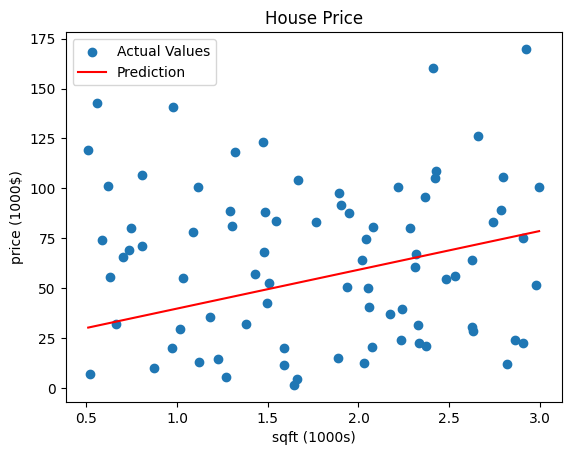

In [18]:
# Create the line
x_range = np.linspace(min(x_train), max(x_train), 100) 
y_pred = x_range * w_final + b_final  # y = x * w + b

# Plot the result
plt.scatter(x_train, y_train, label="Actual Values")  # True data
plt.plot(x_range, y_pred, color="red", label="Prediction") # Linear regression line
plt.xlabel("sqft (1000s)")
plt.ylabel("price (1000$)")
plt.legend()
plt.title("House Price")
plt.show()